## Business Understanding/Overview
Our goal is to help  generate insights for a company by helping them decide what type of films to create for their new movie studio. We will use various datasets related to movies, analyze trends, and provide actionable recommendations based on our findings.Our task is to explore what types of films are currently doing the best from the data sets we have  and translate those findings into actionable insights for the company's  new movie studio.

## Problem Statement


## Objectives
Compare budget to profitability.

Identify the top-performing genres.

Assess profitability by genre.

what movies have ROI

## Research Questions
How does runtime influence audience reception and revenue?
Which studios produce the highest-grossing films, and what genres do they focus on?


In [436]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

### rt_info EDA

In [437]:
rt_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz",index_col=0, sep='\t')
rt_info.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [438]:
rt_info.tail()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [439]:
rt_info.shape

(1560, 11)

In [440]:
rt_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [441]:
#checking for missing values
(rt_info.isna().sum()/len(rt_info))*100

synopsis        3.97
rating          0.19
genre           0.51
director       12.76
writer         28.78
theater_date   23.01
dvd_date       23.01
currency       78.21
box_office     78.21
runtime         1.92
studio         68.33
dtype: float64

Run time, Rating  and Genre have a low percentage of missing values

In [442]:
rt_info.describe()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
count,1498,1557,1552,1361,1111,1201,1201,340,340,1530,494
unique,1497,6,299,1125,1069,1025,717,1,336,142,200
top,A group of air crash survivors are stranded in...,R,Drama,Steven Spielberg,Woody Allen,"Jan 1, 1987","Jun 1, 2004",$,"200,000",90 minutes,Universal Pictures
freq,2,521,151,10,4,8,11,340,2,72,35


In [443]:
#checking for the data types in column runtime
(rt_info['runtime'].dtype)

dtype('O')

In [444]:
# Replace missing values with "Unknown"
rt_info['genre'] = rt_info['genre'].fillna('Unknown')


In [445]:
# Replace missing values with "Unknown"
rt_info['rating'] = rt_info['rating'].fillna('Unknown')


In [446]:
#checking for missing values after replacing
#New missing values
(rt_info.isna().sum()/len(rt_info))*100

synopsis        3.97
rating          0.00
genre           0.00
director       12.76
writer         28.78
theater_date   23.01
dvd_date       23.01
currency       78.21
box_office     78.21
runtime         1.92
studio         68.33
dtype: float64

In [447]:
(rt_info['runtime'].dtype)

dtype('O')

In [448]:
# Extract numeric values from runtime strings and convert to numeric
rt_info['runtime'] = rt_info['runtime'].str.extract('(\d+)').astype(float)


In [449]:
# Replace NaN values with the mean runtime
mean_runtime = rt_info['runtime'].mean()
rt_info['runtime'] = rt_info['runtime'].fillna(mean_runtime)


In [450]:
rt_info['genre'].value_counts()

Drama                                                                                           151
Comedy                                                                                          110
Comedy|Drama                                                                                     80
Drama|Mystery and Suspense                                                                       67
Art House and International|Drama                                                                62
                                                                                               ... 
Classics|Drama|Musical and Performing Arts|Mystery and Suspense                                   1
Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts        1
Classics|Comedy|Drama|Kids and Family|Musical and Performing Arts                                 1
Art House and International|Classics|Horror|Science Fiction and Fantasy                           1


In [451]:
# Use the first genre only
#This is done to make the genre column more readable
rt_info['genre'] = rt_info['genre'].str.split('|').str[0]


In [452]:
(rt_info['genre'].unique())

array(['Action and Adventure', 'Drama', 'Comedy', 'Unknown',
       'Documentary', 'Classics', 'Art House and International',
       'Musical and Performing Arts', 'Horror', 'Mystery and Suspense',
       'Animation', 'Special Interest', 'Kids and Family', 'Western',
       'Science Fiction and Fantasy'], dtype=object)

In [453]:
rt_info.columns


Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

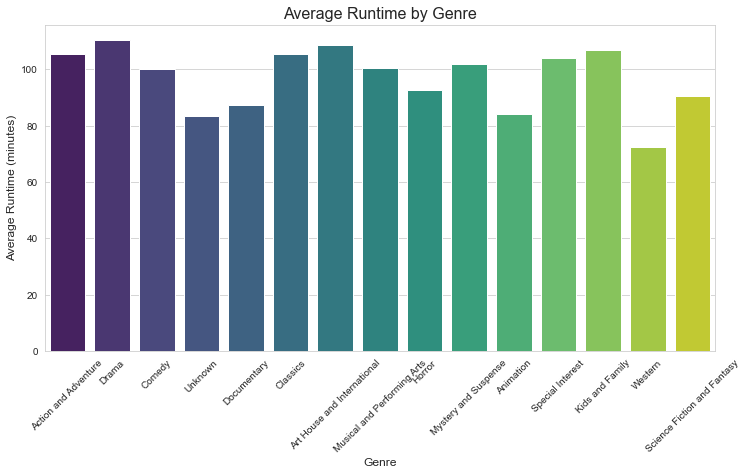

In [454]:
#Plotting the average runtime by genre to see which genre has the highest runtime
plt.figure(figsize=(12, 6))
sns.barplot(data=rt_info, x='genre', y='runtime', ci=None, estimator=np.mean, palette='viridis')
plt.title('Average Runtime by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Runtime (minutes)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


We noted studios might budget runtime differently based on the genre's target audience and storytelling needs.

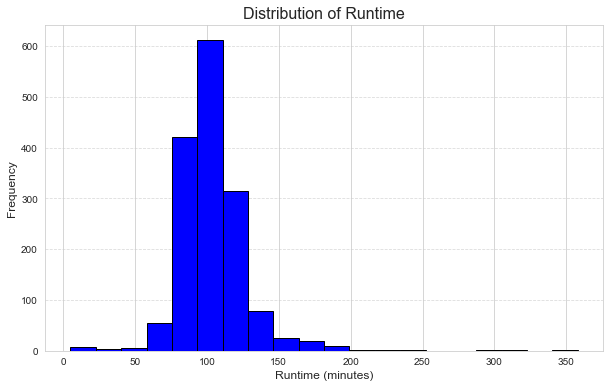

In [455]:

# Create a histogram for the runtime column
plt.figure(figsize=(10, 6))
plt.hist(rt_info['runtime'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Runtime', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


To answer our question, majority of the movies have a runtime between 90 and 110 minutes, indicating that most movies are optimized around the 90–110 minute range, which may balance audience attention span and satisfaction.The distribution is approximately bell-shaped with few (outliers).

In [456]:
print(rt_info.columns)


Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')


In [457]:
rt_info['rating'] = rt_info['rating'].str.extract('(\d+)').astype(float)

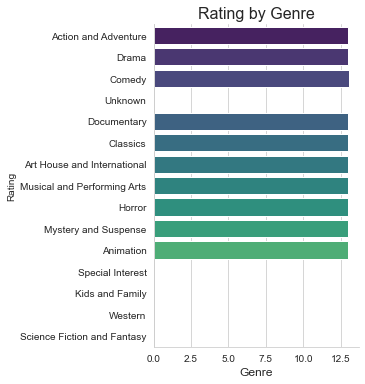

In [462]:
sns.catplot(x='rating', y='genre', data= rt_info, kind='bar', ci=None, estimator=np.mean, palette='viridis')
plt.title('Rating by Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating')
plt.show()